###  "In The Name Of ALLAH"
# Computational Intelligence Lab Report - Lab 6 - Mr. Amini
## Seyed Mohammadsaleh Mirzatabatabaei(smsmt@aut.ac.ir) - 9623105 
---


## Report
---


### Hopfield class


*   **class constructor:** Takes X to set network parameters, generate zero-diagonal and symmetric matrix (W) from it.
*   **predict:**  we completely define the network -its W- with a state vector V that we want to recover after corruption, we can do it by just updating the network states.
In other words, after initializing the network states with V we let the network evolve with the laws we defined before, and it will converge to the states we wanted in the first place. Not only that, but it will remain there no matter how many updates we keep on doing.

In [40]:
import numpy as np


class Hopfield:
  def __init__(self, X):
    self.n = X.shape[0]
    self.w = np.dot(X, X.T) - np.sum(X[0] * X[0]) * np.eye(self.n)

  def predict(self, x, max_iters = 1000, type = 1):
    V = x
    i = 0
    while not np.array_equal(V, np.sign(np.dot(self.w, V))) and i < max_iters:
      if type == 1:
        V = np.sign(np.dot(self.w, V))
      elif type == 2:
        first_dif_index = np.min(np.where(V != np.sign(np.dot(self.w, V)))[0])
        V[first_dif_index] = -1 * V[first_dif_index]
      i += 1
    return V

### Evaluation of Hopfield class over a simple example

Let us have two vector:

V1 = [1, 1, 1, 1]

V2 = [1, -1, -1, 1]


In [41]:
X = np.array([[1, 1, 1, 1], [1, -1, -1, 1]]).T

x = np.array([[1, 1, -1, 1]]).T
# Create hopfield object to predict
hop = Hopfield(X)
print("Matrix W:\n", hop.w)
print("\nFinal recovered vector:\n", hop.predict(x, type = 2))

Matrix W:
 [[0. 0. 0. 2.]
 [0. 0. 2. 0.]
 [0. 2. 0. 0.]
 [2. 0. 0. 0.]]

Final recovered vector:
 [[ 1]
 [-1]
 [-1]
 [ 1]]


### Using Hopfield class to recover noisy images

*   **hopImage:** Open an image from the path and create an appropriate (-1, 1) 1D vector for hopfield network input.
*   **showHopImage:**  Get the 1D vector that used by hopfield network and show the image of that vector.
*   **noisifyImage:**  Add noise to the 1D image vector given percent of noisification. 

In [42]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image


def hopImage(img_path):
  img = np.array(Image.open(img_path).convert('L'))
  img_arr = np.reshape(img, (img.shape[0] * img.shape[1], 1))
  treshold = np.mean(img_arr)
  img_arr = (img_arr > treshold) * 2 - 1
  return img_arr

def showHopImage(img):
  new_img = np.reshape(img, ((int) (np.sqrt(img.shape[0])), (int) (np.sqrt(img.shape[0]))))
  plt.figure();
  plt.imshow(new_img)

def noisifyImage(img_path, percent=10):
  img = np.array(Image.open(img_path).convert('L'))
  img_arr = np.reshape(img, (img.shape[0] * img.shape[1], 1))
  treshold = np.mean(img_arr)
  img_arr = (img_arr > treshold) * 2 - 1
  # Add random noise to image array
  rand = np.random.randint(0, img_arr.shape[0]-1, size=(1, (int)((percent / 100) * img_arr.shape[0])))
  img_arr[rand] = -1 * img_arr[rand]
  return img_arr

Original Images:


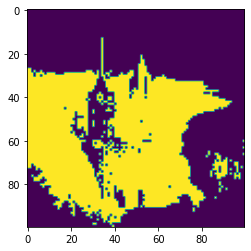

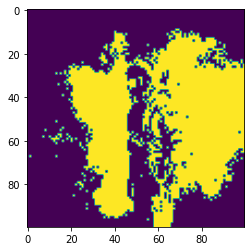

In [43]:
# Open 2 sample image with hopImage function
img1 = hopImage("/content/spacecraft.jpg")
img2 = hopImage("/content/Space Force 2.jpg")

# Show 2 sample original image
print("Original Images:")
showHopImage(img1)
showHopImage(img2)

# Create hopfield network
X = np.concatenate((img1, img2), axis=1)
hopImage = Hopfield(X)

Noisy image:


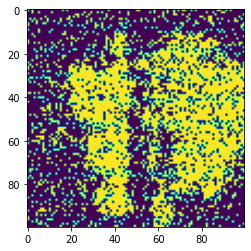

In [44]:
# Add 20 percent noise to image(II)
noisy_img = noisifyImage("/content/Space Force 2.jpg", percent=20)
print("Noisy image:")
showHopImage(noisy_img)

Recovered image:


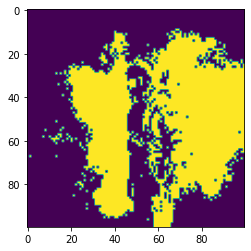

In [45]:
# Recover original image(II) from noisy one
print("Recovered image:")
showHopImage(hopImage.predict(noisy_img))

## Exercise
---







> ### 3- Save and recover words (پ) and (گ) with hopfield



Original Images:


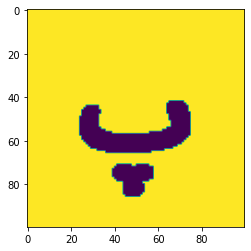

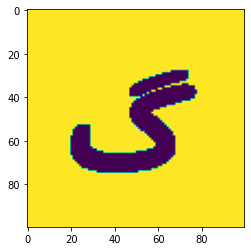

In [47]:
# Open 2 words (پ , گ) image with hopImage function
img_p = hopImage("/content/p.png")
img_g = hopImage("/content/g.png")

# Show original words image
print("Original Images:")
showHopImage(img_p)
showHopImage(img_g)

# Create hopfield network for 2 words
X = np.concatenate((img_p, img_g), axis=1)
hopImage = Hopfield(X)

Noisy words image:


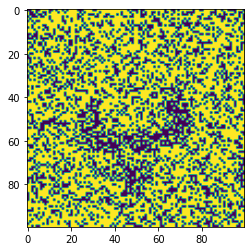

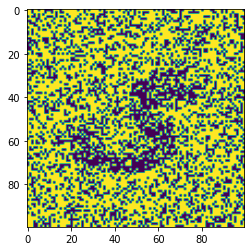

In [38]:
# Add 40 percent noise to words image
noise_percent = 40
img_p_noisy = noisifyImage("/content/p.png", percent=noise_percent)
img_g_noisy = noisifyImage("/content/g.png", percent=noise_percent)

print("Noisy words image:")
showHopImage(img_p_noisy)
showHopImage(img_g_noisy)

Recovered words image:


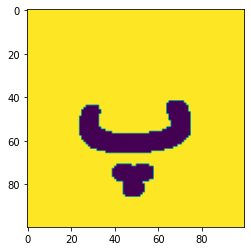

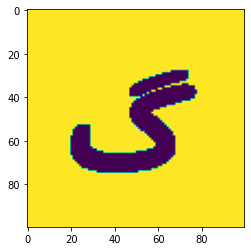

In [48]:
# Recover original words image from noisy one
print("Recovered words image:")
showHopImage(hopImage.predict(img_p_noisy))
showHopImage(hopImage.predict(img_g_noisy))

> ### 4- How to recognize digits with Hopfield network

The purpose of a Hopfield network is to store one or more patterns and to recall the full patterns based on partial input.

**So for this purpose we store different pattern of handwritten digits in a hopfield network! Then, we can get the unrecognized number to the network to see where it converges and in a matter of seconds, we know the number.**

So here’s the way a Hopfield network would work. we map it out so that each pixel is one node in the network. we train it (or just assign the weights) to recognize each of the 10 digits. Now we scan the ink-spread image (input digit image that we want to recognize it) and we input it to the Hopfield network, and it chugs away for a few iterations, and eventually reproduces the pattern, a perfect digit number.


*you can see an example below:*


---



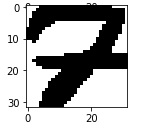 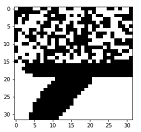

